In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [115]:
def calc_fft(ts, ys):
    length=len(ts)
    dt = ts[1] - ts[0]
    yfft = fft(ys)
    yfft =  2.0 / length * np.abs(yfft[0:length//2])
    yfft[0] = yfft[0] / 2
    return (fftfreq(length, d=dt)[0:length//2], yfft)


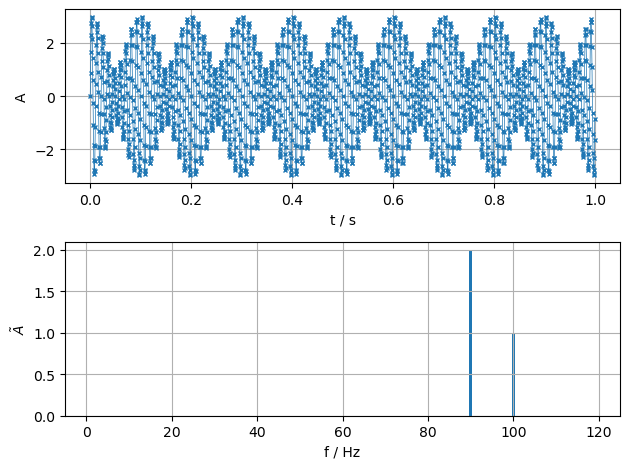

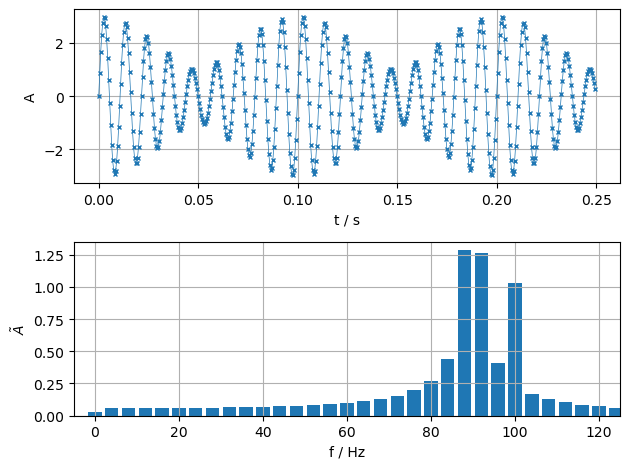

In [116]:
#Datensatzlänge:

dt = 1 / 2000
N = 2000
ts = np.arange(0, dt * N, dt)

f1 = 100
f2 = 90

ys = (np.sin(2* np.pi * f1 * ts) + 2*np.sin(2* np.pi * f2 * ts))

fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(ts, ys, '-x', markersize=3, lw=0.5)
ax1.set(xlabel="t / s", ylabel="A")
ax1.grid()

freqs, yfft = calc_fft(ts, ys)
ax2.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax2.set(xlim=[-5,125])
ax2.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax2.grid()
fig1.tight_layout()


N = 500
ts = np.arange(0, dt * N, dt)
ys = (np.sin(2* np.pi * f1 * ts) + 2*np.sin(2* np.pi * f2 * ts))

fig2, (ax3, ax4) = plt.subplots(2, 1)
ax3.plot(ts, ys, '-x', markersize=3, lw=0.5)
ax3.set(xlabel="t / s", ylabel="A")
ax3.grid()

freqs, yfft = calc_fft(ts, ys)
ax4.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax4.set(xlim=[-5,125])
ax4.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax4.grid()
fig2.tight_layout()

fig1.savefig('out/data_length_long')
fig2.savefig('out/data_length_short')


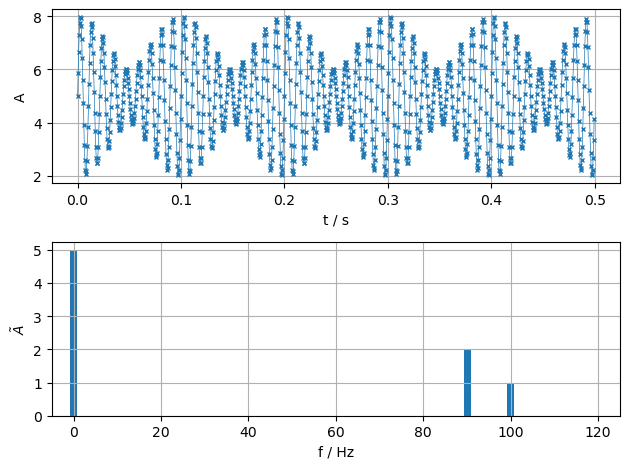

In [117]:
#Offset
fig3, (ax5, ax6) = plt.subplots(2,1)

N = 1000
ts = np.arange(0, dt * N, dt)


f1 = 100
f2 = 90

ys = (np.sin(2* np.pi * f1 * ts) + 2*np.sin(2* np.pi * f2 * ts)) + 5

ax5.plot(ts, ys, '-x', markersize=3, lw=0.5)
ax5.set(xlabel="t / s", ylabel="A")
ax5.grid()

freqs, yfft = calc_fft(ts, ys)
ax6.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax6.set(xlim=[-5,125])
ax6.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax6.grid()
fig3.tight_layout()
fig3.savefig('out/dc_offset')

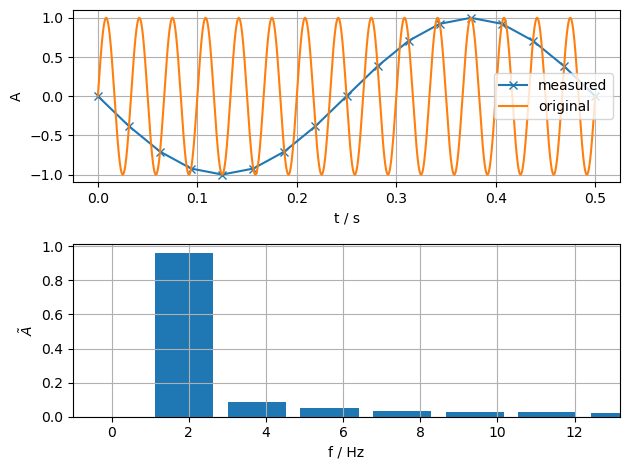

In [135]:
#Unterabtastung
fig4, (ax7, ax8) = plt.subplots(2,1)
N = 17
ts = np.linspace(0, 0.5, N)
f1 = 30
ys = np.sin(2* np.pi * f1 * ts)

ts_fine = np.linspace(np.min(ts), np.max(ts), 3000)
ys_fine = np.sin(2* np.pi * f1 * ts_fine)

#ax7.scatter(ts, ys, 10, marker='x')
ax7.plot(ts, ys, '-x', label='measured')
ax7.plot(ts_fine, ys_fine, label='original')

ax7.set(xlabel="t / s", ylabel="A")
ax7.grid()
ax7.legend()

freqs, yfft = calc_fft(ts, ys)
ax8.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax8.set(xlim=[-1,np.max(freqs)])
ax8.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax8.grid()
fig4.tight_layout()
fig4.savefig('out/aliasing')

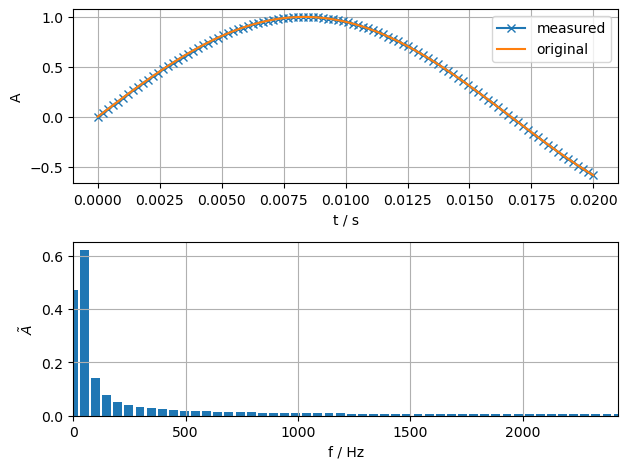

In [142]:
#Überabtastung

fig5, (ax7, ax8) = plt.subplots(2, 1)
N = 100
ts = np.linspace(0, 0.02, N)
f1 = 30
ys = np.sin(2 * np.pi * f1 * ts)

ts_fine = np.linspace(np.min(ts), np.max(ts), 3000)
ys_fine = np.sin(2 * np.pi * f1 * ts_fine)

#ax7.scatter(ts, ys, 10, marker='x')
ax7.plot(ts, ys, '-x', label='measured')
ax7.plot(ts_fine, ys_fine, label='original')

ax7.set(xlabel="t / s", ylabel="A")
ax7.grid()
ax7.legend()

freqs, yfft = calc_fft(ts, ys)
ax8.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax8.set(xlim=[-1, np.max(freqs)])
ax8.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax8.grid()
fig5.tight_layout()
fig5.savefig('out/überabtastung')


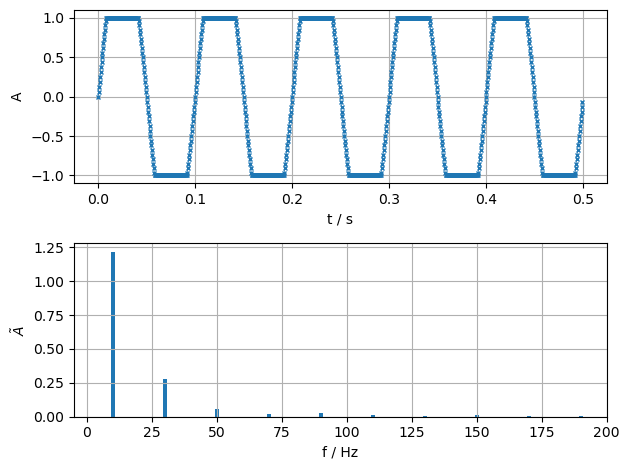

In [157]:
#AD-Overload
dt = 1 / 2000
N = 1000
ts = np.arange(0, dt * N, dt)

f1 = 10
#f2 = 90

ys = 2 * np.sin(2* np.pi * f1 * ts)
ys = np.clip(ys, -1, 1)

fig6, (ax9, ax10) = plt.subplots(2, 1)
ax9.plot(ts, ys, '-x', markersize=3, lw=0.5)
ax9.set(xlabel="t / s", ylabel="A")
ax9.grid()

freqs, yfft = calc_fft(ts, ys)
ax10.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax10.set(xlim=[-5,200])
ax10.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax10.grid()
fig6.tight_layout()

fig6.savefig('out/clipping')